## Predicting loan failures using machine learning credit model

This notebook will first walk you through the steps in data exploration and data cleaning using Pandas.  Then we'll try to predict which customer is going to default on their loans using a machine learning model called Decision Tree.  Before we begin, let's review the analytic process.
The cross-industry standard process for data mining, known as *CRISP-DM*, is an open standard process model that describes common approaches used by data mining experts!
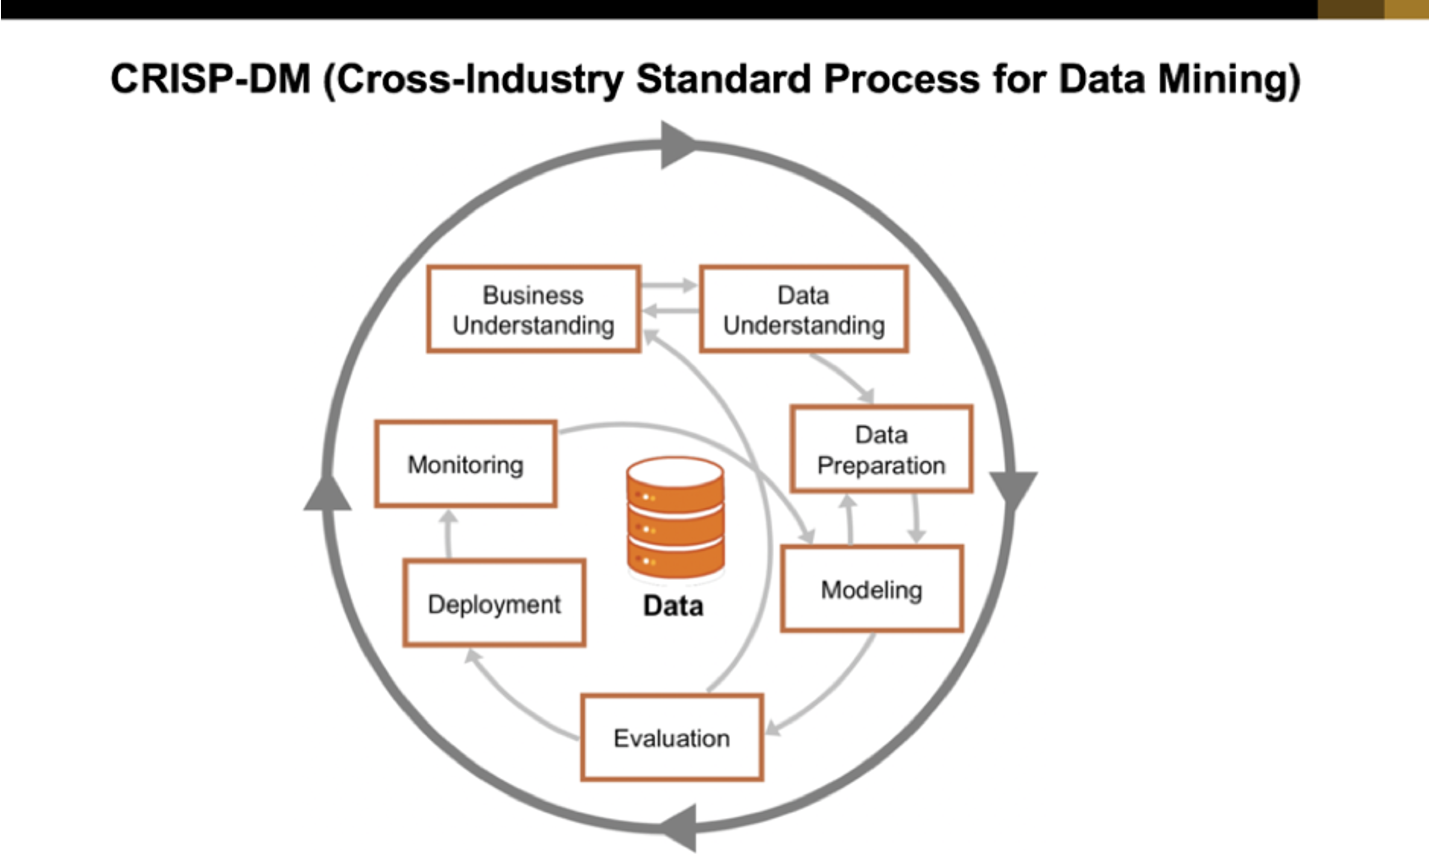
Source: sap.com

Part 1 will focus more on the stages of *Data Exploration* and *Data Preparation*.  These two stages are critical in the building of successful machine learning models.  These two steps are also the most labour intensive and time-consuming stages.  
The dataset is sourced from kaggel.com (https://www.kaggle.com/skihikingkevin/online-p2p-lending).  It combines historical loans from both Prosper and Lending Club from 2013 to 2018.

#### Let's import the data file

In [1]:
# First we will import Panadas and other useful libraries
import os
import numpy as np
import pandas as pd

In [2]:
# Before we read the data file, let's locate the working directory
os.getcwd()

'C:\\Users\\tcliu\\Desktop\\FD25\\Assignments\\Assignment #2 - Predicting Loan Default with a Machine Learning Credit Model'

In [3]:
#cd ~/Downloads
#os.chdir(r'C:\Users\tcliu\Desktop\FD25\Assignments\Assignment #2 - Predicting Loan Default with a Machine Learning Credit Model')

In [4]:
# Let's read the data file into a Pandas dataframe
df = pd.read_csv('p2p_loans.csv')

C:\Users\tcliu\AppData\Local\Temp\ipykernel_29448\2229577966.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('p2p_loans.csv')


It looks like there is a problem with column 7.  Let's keep that in mind, and we'll fix that later.  Let's first get familiar with the dataset.

## Data exploration

Data exploration aims to understand what data exists in a dataset, its characteristics, and the relationship between elements of the data.  
Data exploration has the following stages:
1. Variable identification
2. Data structuring
3. Univariate analysis
4. Bivariate analysis
5. Missing value analysis
6. Outlier analysis

### Initial Exploration: Variable identification (6%)
When you are sourcing data, you will often find that the table names and variables names have little meaning.

Without complete metadata, it is challenging to use the data. The alternative is speaking with the owner or creator of the data, but there are obvious concerns.

The purpose of this exercise is to understand the data, their types, and their limitations.  We'll look at each variable and do a philosophical analysis about its meaning and importance for this problem.

In [5]:
# Let's take a look at the first few rows
df.tail()

,loan_number,amount_borrowed,term,borrower_rate,installment,grade,origination_date,listing_title,loan_status_description,data_source
2875141,1081905,10000.0,36,0.0934,319.582092,B,2018-06-29,NaN,CURRENT,Prosper
2875142,1081908,10000.0,36,0.1214,332.812163,C,2018-06-29,NaN,CURRENT,Prosper
2875143,1081947,4000.0,60,0.2455,116.352367,E,2018-06-29,NaN,CURRENT,Prosper
2875144,1081797,30000.0,60,0.1878,774.589469,D,2018-06-29,NaN,CURRENT,Prosper
2875145,1081953,3500.0,36,0.1024,113.329941,B,2018-06-29,NaN,CURRENT,Prosper


In [6]:
df.shape

(2875146, 10)

In [7]:
df.columns

Index(['loan_number', 'amount_borrowed', 'term', 'borrower_rate',
       'installment', 'grade', 'origination_date', 'listing_title',
       'loan_status_description', 'data_source'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2875146 entries, 0 to 2875145
Data columns (total 10 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   loan_number              int64  
 1   amount_borrowed          float64
 2   term                     int64  
 3   borrower_rate            float64
 4   installment              float64
 5   grade                    object 
 6   origination_date         object 
 7   listing_title            object 
 8   loan_status_description  object 
 9   data_source              object 
dtypes: float64(3), int64(2), object(5)
memory usage: 219.4+ MB


Luckily, the column names are very intuitive.  Otherwise, you'll need to invest time in searching for the correct data explanation. 
Based on the initial exploration and your understanding of the business, which 3 columns do you think will be the least important to predicting bad loans?  

Please include your answer within the notebook.

*Type your answer here:*
I think the 3 columns that will be the least important to predicting bad loans are:
"loan_number", "data_source", and "listing_title". 

### Data structuring
Data does not often come formatted for modelling. We sometimes have to transform a long data table into a wide data table and vice versa. Luckily, our dataset here does not require transformation.
Example:
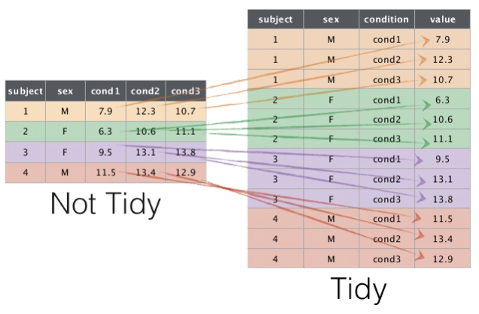

### Univariate Analysis (20%)
Univariate analysis is about understanding each variable individually. These are the statistics you are probably most familiar with: mean, mode, median, max, min, quartiles, standard deviation, and frequency. 
These can be visualized using 
* histograms
* box plots
* line charts for time series variables

We will go through a few columns and review them carefully.

In [9]:
# Let's import some python libraries that can help us analyse 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2875146 entries, 0 to 2875145
Data columns (total 10 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   loan_number              int64  
 1   amount_borrowed          float64
 2   term                     int64  
 3   borrower_rate            float64
 4   installment              float64
 5   grade                    object 
 6   origination_date         object 
 7   listing_title            object 
 8   loan_status_description  object 
 9   data_source              object 
dtypes: float64(3), int64(2), object(5)
memory usage: 219.4+ MB


Loan numbers are sort of like account numbers, looking at the distriubiton won't provide much value.  Instead we want to see whether there are missing or duplicated values.

In [11]:
df['loan_number'].describe()

count    2.875146e+06
mean     5.076601e+07
std      4.813839e+07
min      5.571600e+04
25%      8.654122e+05
50%      4.516220e+07
75%      9.391978e+07
max      1.360671e+08
Name: loan_number, dtype: float64

In [12]:
# looking for missing values
df['loan_number'].isnull().sum()

0

In [13]:
# looking for duplicates
df['loan_number'].duplicated().sum()

1058

In [14]:
# create a duplicated list for further analysis
dup = df[df['loan_number'].duplicated(keep=False)]

In [15]:
dup.sort_values(by=['loan_number'])

,loan_number,amount_borrowed,term,borrower_rate,installment,grade,origination_date,listing_title,loan_status_description,data_source
889167,288279,20225.0,60,0.0839,413.880000,B,2016-03-01T00:00,credit_card,CURRENT,Lending Club
2201072,288279,25000.0,60,0.1543,600.405944,D,2015-03-17,NaN,COMPLETED,Prosper
197106,300390,12000.0,36,0.0649,367.740000,A,2014-12-01T00:00,debt_consolidation,COMPLETED,Lending Club
2212428,300390,15000.0,36,0.0736,465.629411,A,2015-03-31,NaN,COMPLETED,Prosper
587261,302598,17600.0,60,0.0999,373.870000,B,2015-08-01T00:00,credit_card,CURRENT,Lending Club
...,...,...,...,...,...,...,...,...,...,...
187512,1081779,7050.0,36,0.0790,220.600000,A,2012-01-01T00:00,debt_consolidation,COMPLETED,Lending Club
2875091,1081833,20000.0,36,0.2330,777.325124,E,2018-06-29,NaN,CURRENT,Prosper
187409,1081833,9000.0,36,0.0662,276.340000,A,2012-01-01T00:00,credit_card,COMPLETED,Lending Club
187501,1081977,15000.0,36,0.1527,521.970000,C,2012-01-01T00:00,debt_consolidation,CHARGEOFF,Lending Club


*Is there duplicated loans?  Why is that? Should you be concerned about this and investigate further?*

Next let's look at the amount borrowed.

In [16]:
df['amount_borrowed'].describe()

count    2.875146e+06
mean     1.447258e+04
std      8.763608e+03
min      1.000000e+03
25%      8.000000e+03
50%      1.200000e+04
75%      2.000000e+04
max      4.000000e+04
Name: amount_borrowed, dtype: float64

In [17]:
# Let's import some python libraries that can help us analyse 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\tcliu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


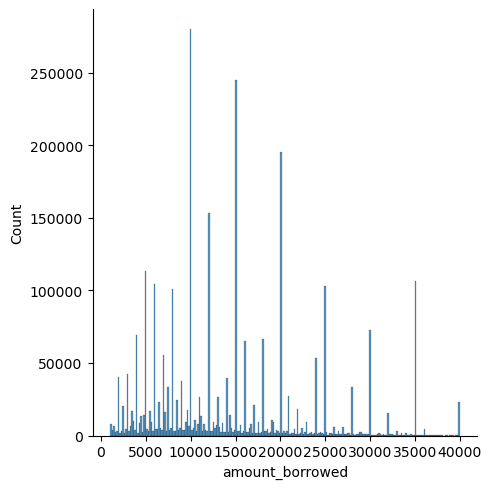

In [18]:
sns.displot(df['amount_borrowed'])

<Axes: xlabel='amount_borrowed'>

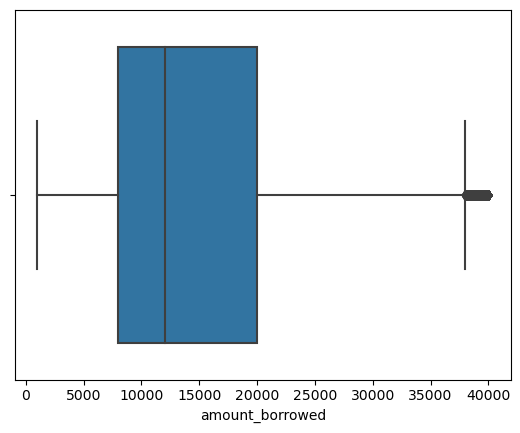

In [19]:
sns.boxplot(x=df['amount_borrowed'])

In [20]:
#skewness and kurtosis
print("Skewness: %f" % df['amount_borrowed'].skew())
print("Kurtosis: %f" % df['amount_borrowed'].kurt())

Skewness: 0.812084
Kurtosis: 0.024130


Let us examine a categlorical variable, 'listing_title'

In [21]:
df['listing_title'].describe()

count                2012068
unique                    14
top       debt_consolidation
freq                 1154304
Name: listing_title, dtype: object

[Text(0, 0, 'debt_consolidation'),
 Text(1, 0, 'home_improvement'),
 Text(2, 0, 'credit_card'),
 Text(3, 0, 'other'),
 Text(4, 0, 'major_purchase'),
 Text(5, 0, 'small_business'),
 Text(6, 0, 'house'),
 Text(7, 0, 'moving'),
 Text(8, 0, 'medical'),
 Text(9, 0, 'car'),
 Text(10, 0, 'vacation'),
 Text(11, 0, 'renewable_energy'),
 Text(12, 0, 'wedding'),
 Text(13, 0, 'educational')]

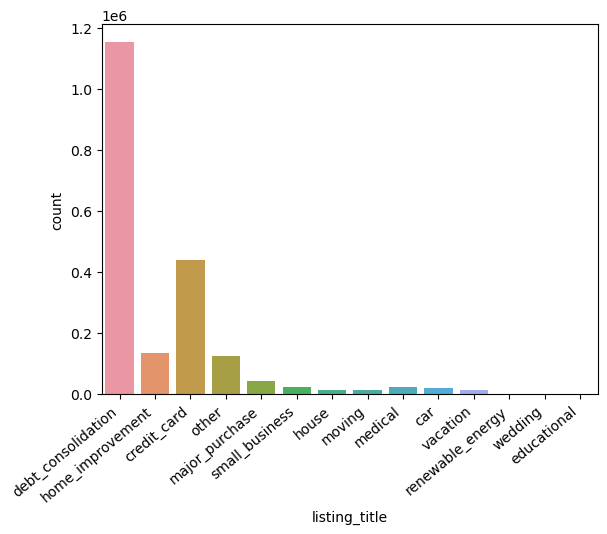

In [22]:
ax = sns.countplot(x=df['listing_title'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

Examining "term".

In [23]:
#feature: term
df['term'].describe()

count    2.875146e+06
mean     4.294869e+01
std      1.089006e+01
min      1.200000e+01
25%      3.600000e+01
50%      3.600000e+01
75%      6.000000e+01
max      6.000000e+01
Name: term, dtype: float64

In [24]:
# looking for missing values
df['term'].isnull().sum()

0

In [25]:
# looking for duplicates
df['term'].duplicated().sum()

2875143

In [26]:
df['term'].unique()

array([36, 60, 12], dtype=int64)

C:\Users\tcliu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


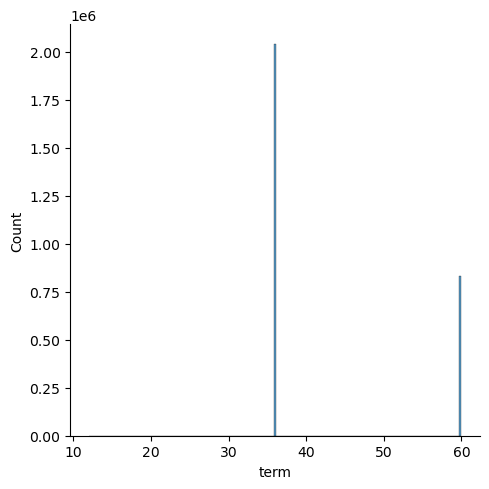

In [27]:
sns.displot(df['term'])

<Axes: xlabel='term'>

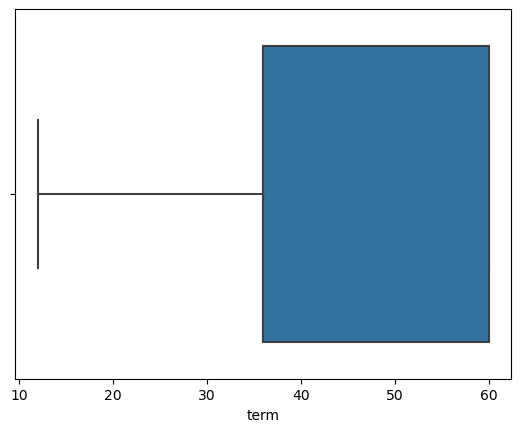

In [28]:
sns.boxplot(x=df['term'])

Examining "borrower_rate"

In [29]:
df['borrower_rate'].describe()

count    2.875146e+06
mean     1.382498e-01
std      5.515687e-02
min      5.310000e-02
25%      9.920000e-02
50%      1.299000e-01
75%      1.677000e-01
max      3.192000e-01
Name: borrower_rate, dtype: float64

In [30]:
# looking for missing values
df['borrower_rate'].isnull().sum()

0

In [31]:
# looking for duplicates
df['borrower_rate'].duplicated().sum()

2874290

C:\Users\tcliu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


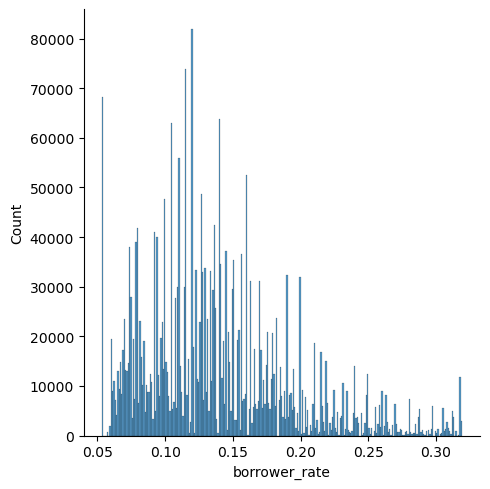

In [32]:
sns.displot(df['borrower_rate'])

<Axes: xlabel='borrower_rate'>

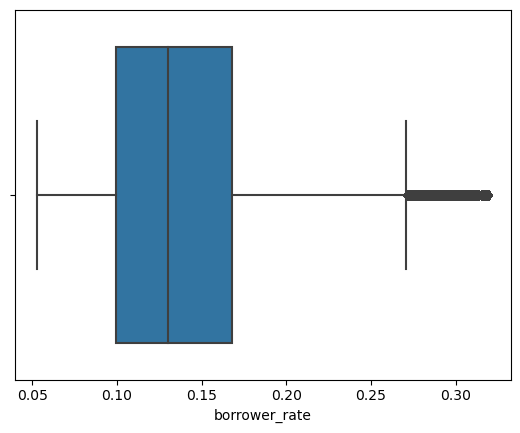

In [33]:
sns.boxplot(x=df['borrower_rate'])

In [34]:
#skewness and kurtosis
print("Skewness: %f" % df['borrower_rate'].skew())
print("Kurtosis: %f" % df['borrower_rate'].kurt())

Skewness: 0.924474
Kurtosis: 0.726619


Examining "installment"

In [35]:
df['installment'].describe()

count    2.875146e+06
mean     4.335797e+02
std      2.565165e+02
min      4.930000e+00
25%      2.481491e+02
50%      3.732400e+02
75%      5.718100e+02
max      2.251506e+03
Name: installment, dtype: float64

In [36]:
# looking for missing values
df['installment'].isnull().sum()

0

In [37]:
# looking for duplicates
df['installment'].duplicated().sum()

2717836

C:\Users\tcliu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


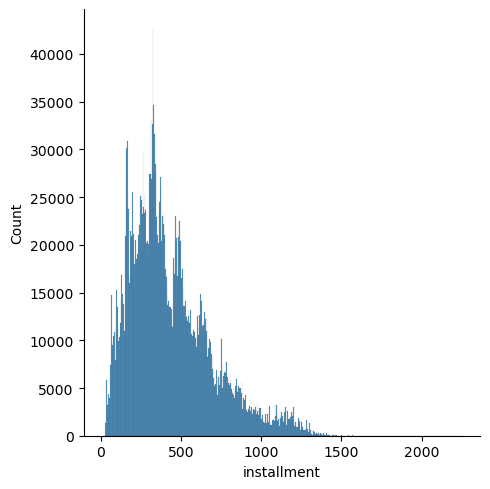

In [38]:
sns.displot(df['installment'])

<Axes: xlabel='installment'>

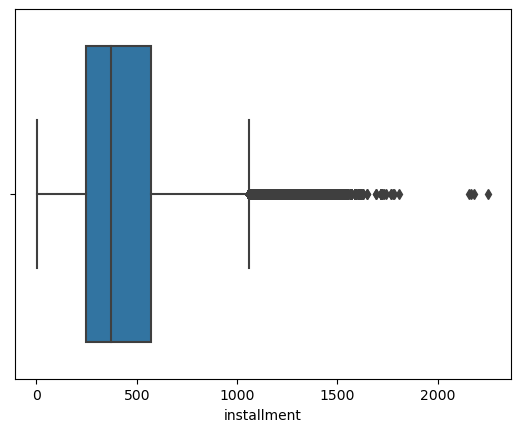

In [39]:
sns.boxplot(x=df['installment'])

In [40]:
#skewness and kurtosis
print("Skewness: %f" % df['installment'].skew())
print("Kurtosis: %f" % df['installment'].kurt())

Skewness: 1.019533
Kurtosis: 0.841710


Examining "grade"

In [41]:
df['grade'].describe()

count     2875146
unique          7
top             C
freq       787525
Name: grade, dtype: object

In [42]:
df['grade'].isnull().sum()

0

In [43]:
df['grade'].duplicated().sum()

2875139

C:\Users\tcliu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


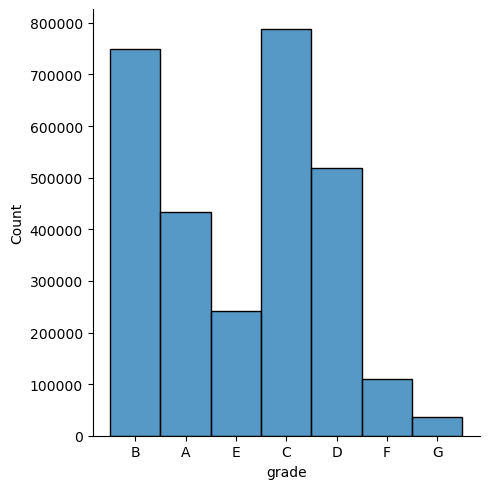

In [44]:
sns.displot(df['grade'])

Examining "origination_date"

Examining "origination_date"

In [45]:
df['origination_date'].describe()

count              2875146
unique                1459
top       2016-03-01T00:00
freq                 61992
Name: origination_date, dtype: object

In [46]:
df['origination_date'].isnull().sum()

0

In [47]:
df['origination_date'].duplicated().sum()

2873687

C:\Users\tcliu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


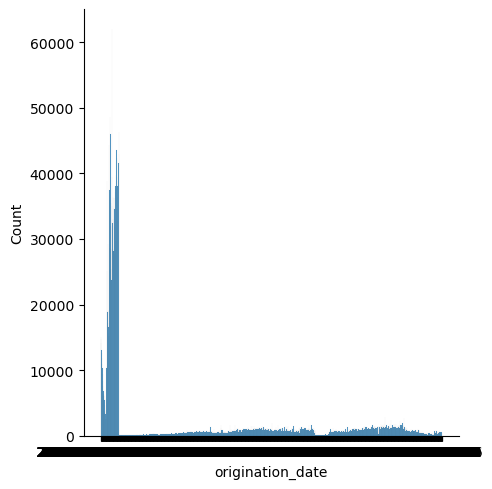

In [48]:
sns.displot(df['origination_date'])

In [49]:
import matplotlib.pyplot as plt

In [50]:
df['origination_date'] = pd.to_datetime(df['origination_date'],format='ISO8601')

In [51]:
df.sort_values(by='origination_date', inplace=True)

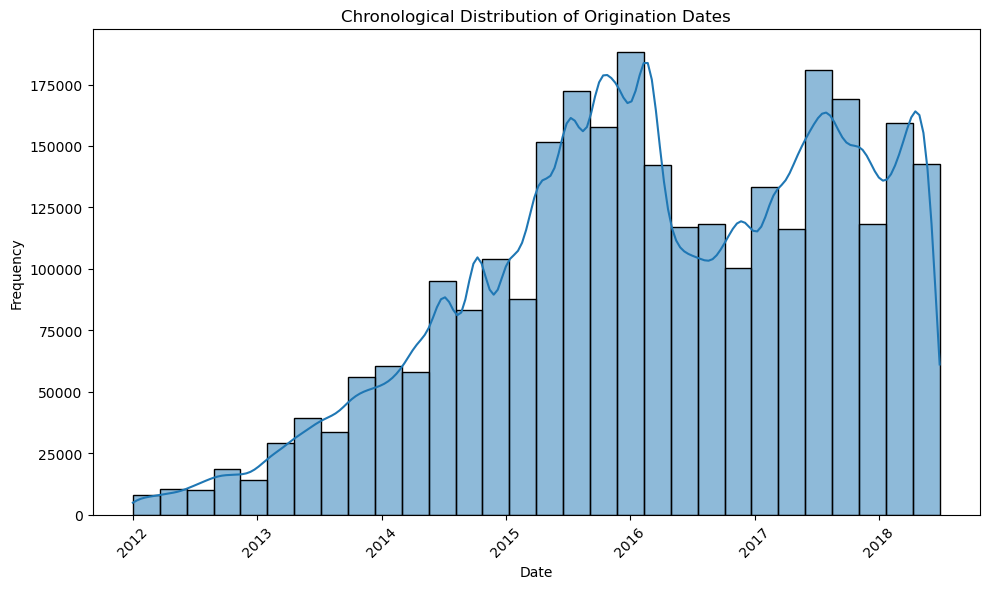

In [52]:
plt.figure(figsize=(10, 6))
sns.histplot(df['origination_date'], bins=30, kde=True)
plt.title('Chronological Distribution of Origination Dates')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Examining "loan_status_description"

In [53]:
df['loan_status_description'].describe()

count     2875146
unique          5
top       CURRENT
freq      1381520
Name: loan_status_description, dtype: object

In [54]:
df['loan_status_description'].isnull().sum()

0

In [55]:
df['loan_status_description'].duplicated().sum()

2875141

In [56]:
df['loan_status_description'].unique().sum()

'COMPLETEDCHARGEOFFDEFAULTEDCURRENTCANCELLED'

C:\Users\tcliu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


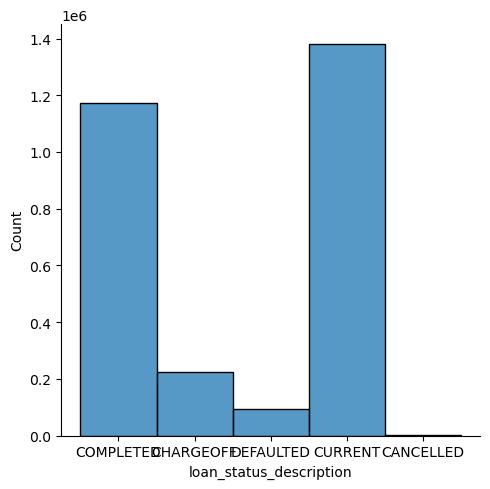

In [57]:
sns.displot(df['loan_status_description'])

Examining "data_source"

In [58]:
df['data_source'].describe()

count          2875146
unique               2
top       Lending Club
freq           1961527
Name: data_source, dtype: object

In [59]:
df['data_source'].isnull().sum()

0

In [60]:
df['data_source'].duplicated().sum()

2875144

C:\Users\tcliu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


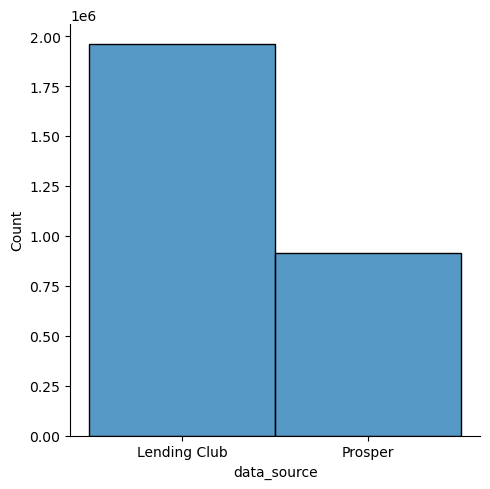

In [61]:
sns.displot(df['data_source'])

I only went over 3 of 9 features here.  You will repeat the above steps to get familiar with the rest of the features and the target.
Here are some questions that you'll ask when you are going through each column:
* Are there missing or duplicated data?
* How is the data distributed? Are there any interesting patterns?
* Are there data outliers?
* Is the data balanced?

List out 5 observations that you think are interesting.  I will accept point-form.
You will then try to address these questions later in the 'Data Preparation' stage.

*Type your answers here.  Add more boxes if you need to*
Observations:
1. Term value can only be 12, 36 or 60, term data seems unbalanced. Amount of 36 term loans are more than double of 60 term loans. There are very few 12 month term loans.
2. listing_title seems unbalanced, debt_consolidation vastly outnumbers everything else.
3. borrower_rate and installment contains lots of outliers.
4. there was a large dip in origination frequency after the 2016 peak.
5. "COMPLETED" and "CURRENT" accounts for majority of the loan status, this data would be inbalanced when predicting default.
6. lending club data is almost double of propser data, implying inbalance.

### Bivariate Analysis (9%)
The bivariate analysis begins to look at variables in pairs. The most common bivariate analysis is 'correlation', which can be visualized using a heatmap or a scatterplot.

A regression with only two variables produces the line of best fit you are used to seeing in Excel, and the correlation coefficient!

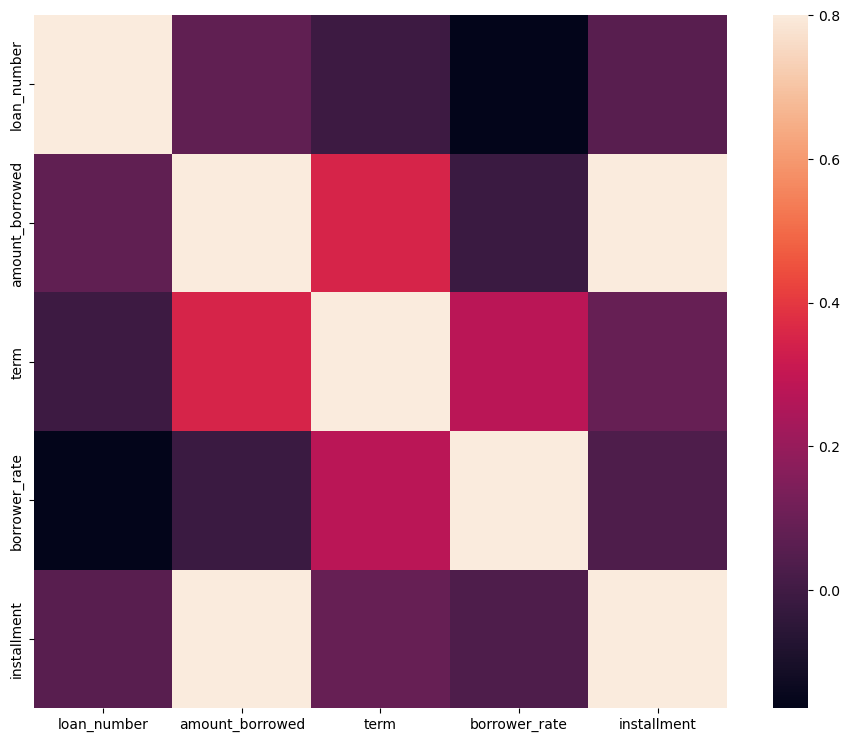

In [62]:
#correlation matrix
corrmat = df.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

C:\Users\tcliu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


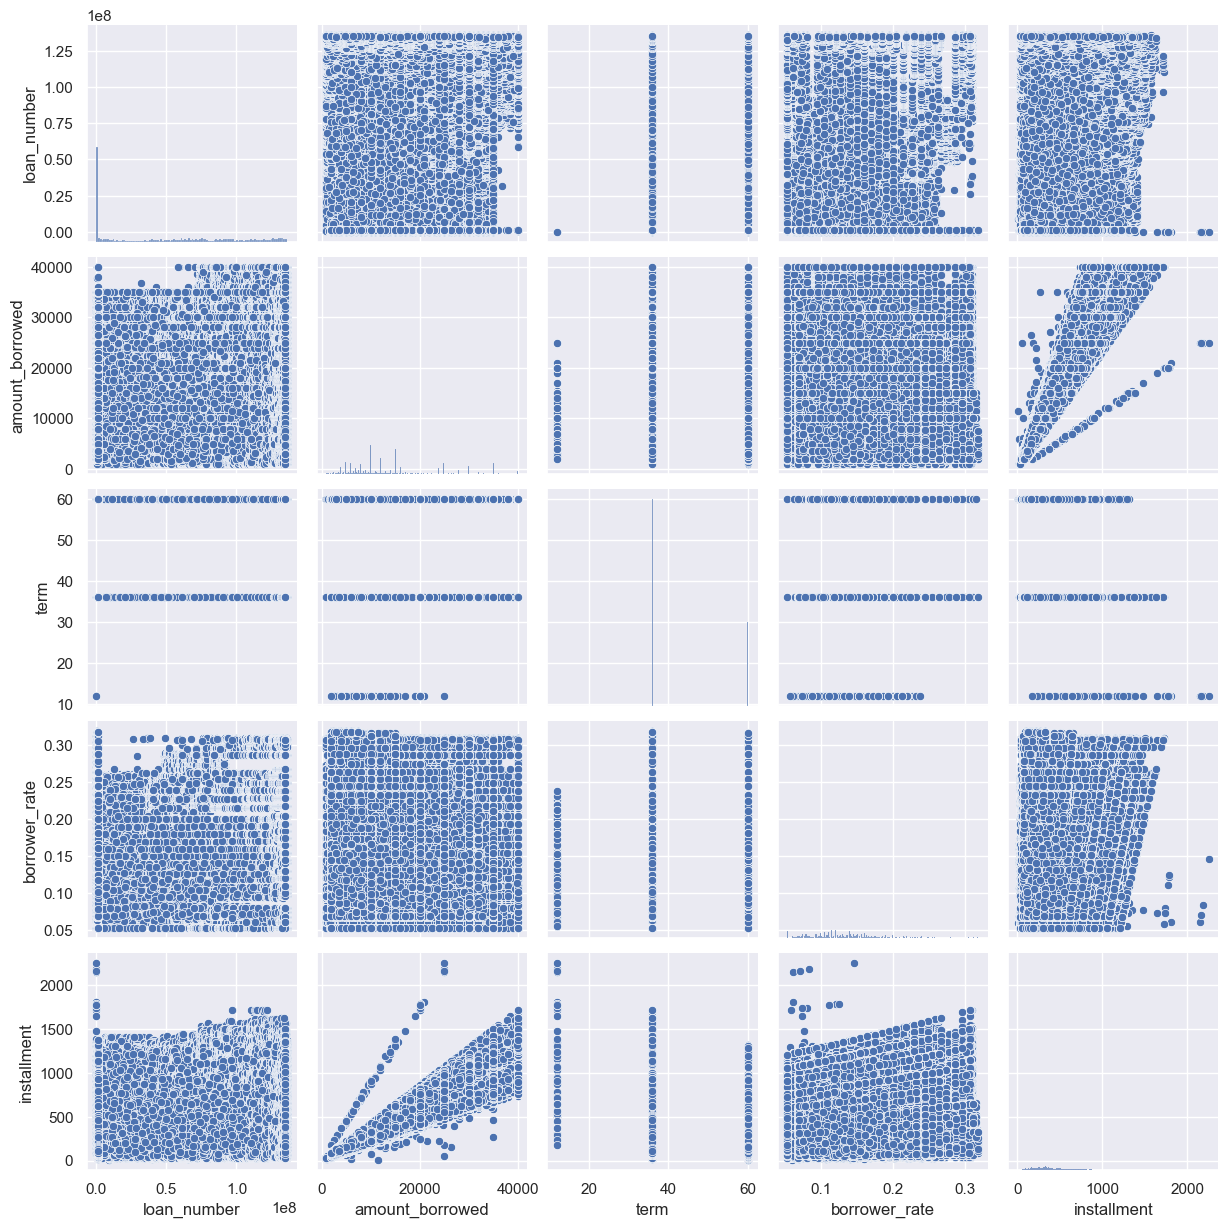

In [63]:
#scatterplot
sns.set()
cols = ['loan_number', 'amount_borrowed', 'term', 'borrower_rate',
       'installment', 'grade', 'origination_date', 'listing_title',
       'loan_status_description', 'data_source']
sns.pairplot(df[cols])
plt.show();

By looking at the heatmap and the scatterplot above, what conclusion can you draw?  Are there any high/low correlations that jump out?  Do they make sense?
We will incorporate this thinking into our next stage in 'Feature selection'.
*Note* that only continuous variables are shown.  We can also incorporate categorical variables into the scatter plot, but we'll have to do some data transformation.  We will do that in the Data cleaning part, and you may re-run the scatter plot after the transformation.

3 obserbations that stood out to me:
    1. amount borrowed seems to have high correlation with installment. This makes sense because the more one borrows the more one should pay, especially when term is usually fixed to either 36 or 60.
    2. term and amount borrowed seem to have medium to high correlation. This makes some sense because we can typically expect longer payback time the larger the borrowed amount.
    3. term and borrower rate are somewhat correlated. This doesnt make much sense to me right now.

## Data Preparation (15%)

This is the part where we make changes to the dataset so that it can feed nicely into the Machine Learning Models.
Data cleaning usually involves at least one of the below processes:
Dealing with inconsistent recording
* Removing unwanted observations
* Removing duplicates
* Investigating outliers
* Dealing with missing items


### Cleaning up the date columns

Remember there was a warning message when we import the file?  Dates should be imported into the dataframe as data type 'datetime' instead of 'object'.  Let's clean up this dataset by transforming all dates to 'datetime' format.

In [64]:
df['origination_date'] = pd.to_datetime(df['origination_date'], format='ISO8601')

In [65]:
# Now check
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2875146 entries, 187627 to 2875145
Data columns (total 10 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   loan_number              int64         
 1   amount_borrowed          float64       
 2   term                     int64         
 3   borrower_rate            float64       
 4   installment              float64       
 5   grade                    object        
 6   origination_date         datetime64[ns]
 7   listing_title            object        
 8   loan_status_description  object        
 9   data_source              object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 241.3+ MB


### Handling Missing Data
There are a few options in dealing with missing data.  We could simply drop the row, given the dataset is large enough. Otherwise, you can consider some form of data imputation to address the problem:
* Mean substitution
* Regression with multiple imputation
* Full information maximum likelihood

There are Python packages that can assist you with data imputation, but we will not get into that.

In [66]:
df.isnull().sum()

loan_number                     0
amount_borrowed                 0
term                            0
borrower_rate                   0
installment                     0
grade                           0
origination_date                0
listing_title              863078
loan_status_description         0
data_source                     0
dtype: int64

All the missing data comes from 'listing_title'.  What will you do?  Should you replace missing value with something like 'unknown'? or do you remove these rows?

In [67]:
# We will replace all the 'NaN's in the column 'listing_title'
df['listing_title'] = df['listing_title'].fillna('unknown')

In [68]:
df['listing_title'].value_counts()

listing_title
debt_consolidation    1154304
unknown                863078
credit_card            441191
home_improvement       136263
other                  124427
major_purchase          44442
medical                 24808
small_business          22834
car                     21261
vacation                13992
moving                  13336
house                   12099
wedding                  1850
renewable_energy         1259
educational                 2
Name: count, dtype: int64

### Keeping only useful rows

In [69]:
# Let us examine the target column "loan_status_description"
df['loan_status_description'].value_counts()

loan_status_description
CURRENT      1381520
COMPLETED    1173162
CHARGEOFF     222867
DEFAULTED      95344
CANCELLED       2253
Name: count, dtype: int64

If we only want the Machine Learning model to predict whether a loan will be 'completed' or 'defaulted', the other status in our target column may be removed or recategorized.

What do you think is the best course of action?


In [70]:
#added chargeoff and cancelled 
df_filtered = df.loc[df['loan_status_description'].isin(['COMPLETED','DEFAULTED','CHARGEOFF','CANCELLED'])]

In [71]:
df_filtered['loan_status_description'].value_counts()

loan_status_description
COMPLETED    1173162
CHARGEOFF     222867
DEFAULTED      95344
CANCELLED       2253
Name: count, dtype: int64

Number of default loan is only ~8% of all records.  This is a 'imbalanced' dataset.

In [72]:
df_filtered['loan_outcome'] = df['loan_status_description'].apply(lambda x: 'GOOD' if x == 'COMPLETED' else 'NOT GOOD')

C:\Users\tcliu\AppData\Local\Temp\ipykernel_29448\702157616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['loan_outcome'] = df['loan_status_description'].apply(lambda x: 'GOOD' if x == 'COMPLETED' else 'NOT GOOD')


In [73]:
df_filtered['loan_outcome'].value_counts()

loan_outcome
GOOD        1173162
NOT GOOD     320464
Name: count, dtype: int64

### Removing features that may not be useful

Decision Tree is one of the most widely-used ML algorithms.  It can handle both continuous and categorical data.  However, it cannot process 'datetime', unless we transform 'datetime' into a numerical value like age, or categrical value like seasons or year.  For my example here, I will remove the 'origination_dates' to keep things simple.  You may play with some feature engineering if you wish to see whether that can improve the model.  
We also need to convert categorical variables into numerical 'levels'.  The codes are provided for you below:



In [74]:
# We will remove the datetime columns and other irrelavent columns
df_filtered = df_filtered.drop(columns=['origination_date', 'data_source','loan_status_description'])

In [75]:
df_filtered.head()

,loan_number,amount_borrowed,term,borrower_rate,installment,grade,listing_title,loan_outcome
187627,1054241,6625.0,36,0.0790,207.30,A,credit_card,GOOD
186448,1101617,7000.0,36,0.0790,219.04,A,credit_card,GOOD
186447,1101472,1200.0,36,0.0790,37.55,A,debt_consolidation,GOOD
186446,1101635,20000.0,36,0.0890,635.07,A,major_purchase,NOT GOOD
186445,1099185,35000.0,36,0.1903,1283.50,E,debt_consolidation,GOOD


Walk me through what you’ve done to prepare your dataset for the next step.  There is no right or wrong answer here.  Your grade will be based on the reasons for such action and the clarity of communication.

*Type your answers below.  Add text boxes if needed.*

In addition to "COMPLETED" and "DEFAULTED" status loans, I have decided to include "CHARGEOFF" and "CANCELLED" loans.
By definition, a chargeoff is when a lender or creditor has written the account off as a loss, and the account is closed to future charges.
Cancelled loans are a partial or complete reduction in one's debts.
Therefore, chargeoff and cancelled loans are undesired outcomes that will hurt the creditors profitability, and should be prevented. This brings closer the gap in previously identified data imbalance .

I've grouped these outcomes into 2 catagories, good or bad. Completed loans are good. Defaulted, chargeoff, and cancelled loans are bad.

### Data transformation

In [76]:
# Decision tree cannot process categorical variables that are strings(objects).  
# We need to transform them into numerical levels using a library called LabelEncoder.
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df_filtered['grade'] = labelencoder.fit_transform(df_filtered['grade'])
df_filtered['listing_title'] = labelencoder.fit_transform(df_filtered['listing_title'])
# 0 = good, 1 = default
df_filtered['loan_outcome'] = labelencoder.fit_transform(df_filtered['loan_outcome'])

In [77]:
# Let check the transformation
df_filtered.head()

,loan_number,amount_borrowed,term,borrower_rate,installment,grade,listing_title,loan_outcome
187627,1054241,6625.0,36,0.0790,207.30,0,1,0
186448,1101617,7000.0,36,0.0790,219.04,0,1,0
186447,1101472,1200.0,36,0.0790,37.55,0,2,0
186446,1101635,20000.0,36,0.0890,635.07,0,6,1
186445,1099185,35000.0,36,0.1903,1283.50,4,2,0


In [78]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1493626 entries, 187627 to 2869949
Data columns (total 8 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   loan_number      1493626 non-null  int64  
 1   amount_borrowed  1493626 non-null  float64
 2   term             1493626 non-null  int64  
 3   borrower_rate    1493626 non-null  float64
 4   installment      1493626 non-null  float64
 5   grade            1493626 non-null  int32  
 6   listing_title    1493626 non-null  int32  
 7   loan_outcome     1493626 non-null  int32  
dtypes: float64(3), int32(3), int64(2)
memory usage: 85.5 MB


In [79]:
df_filtered['loan_outcome'].unique()

array([0, 1])

C:\Users\tcliu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


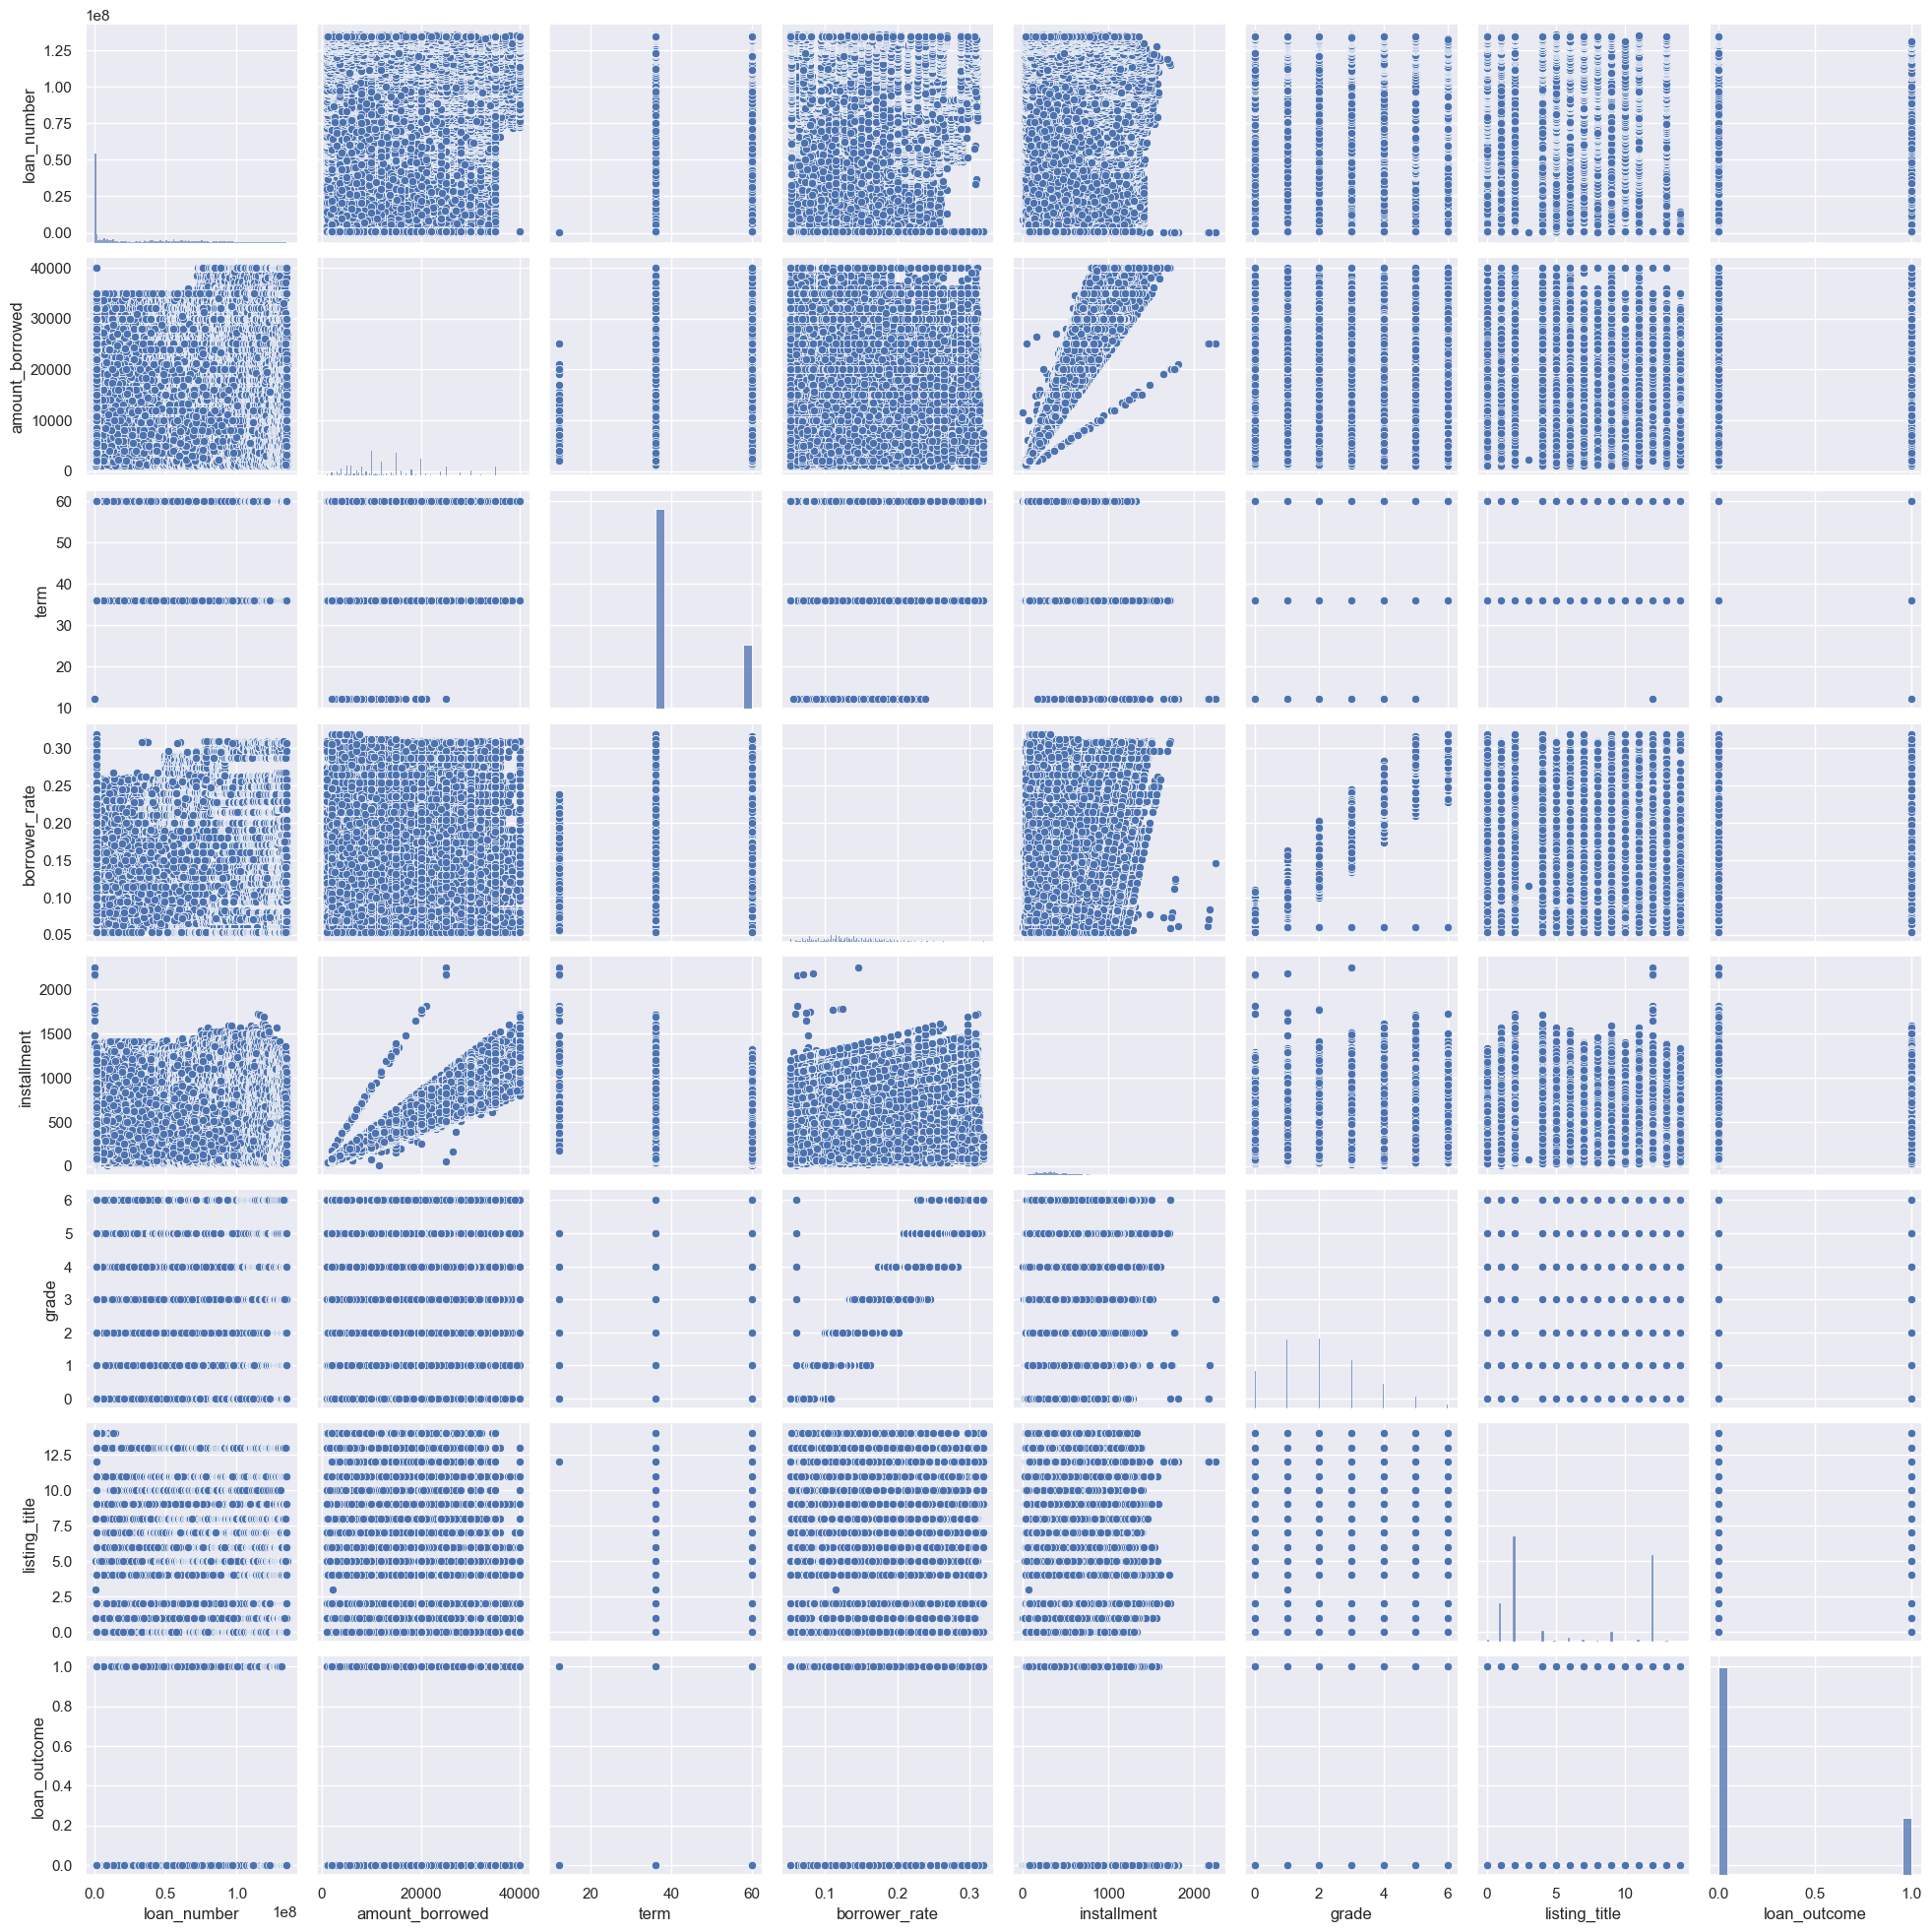

In [80]:
# Now let's try the scatterplot again.  We can see the categorical variables showing now.
sns.set()
cols = ['loan_number', 'amount_borrowed', 'term', 'borrower_rate',
       'installment', 'grade', 'listing_title',
       'loan_outcome']
sns.pairplot(df_filtered[cols])
plt.show();

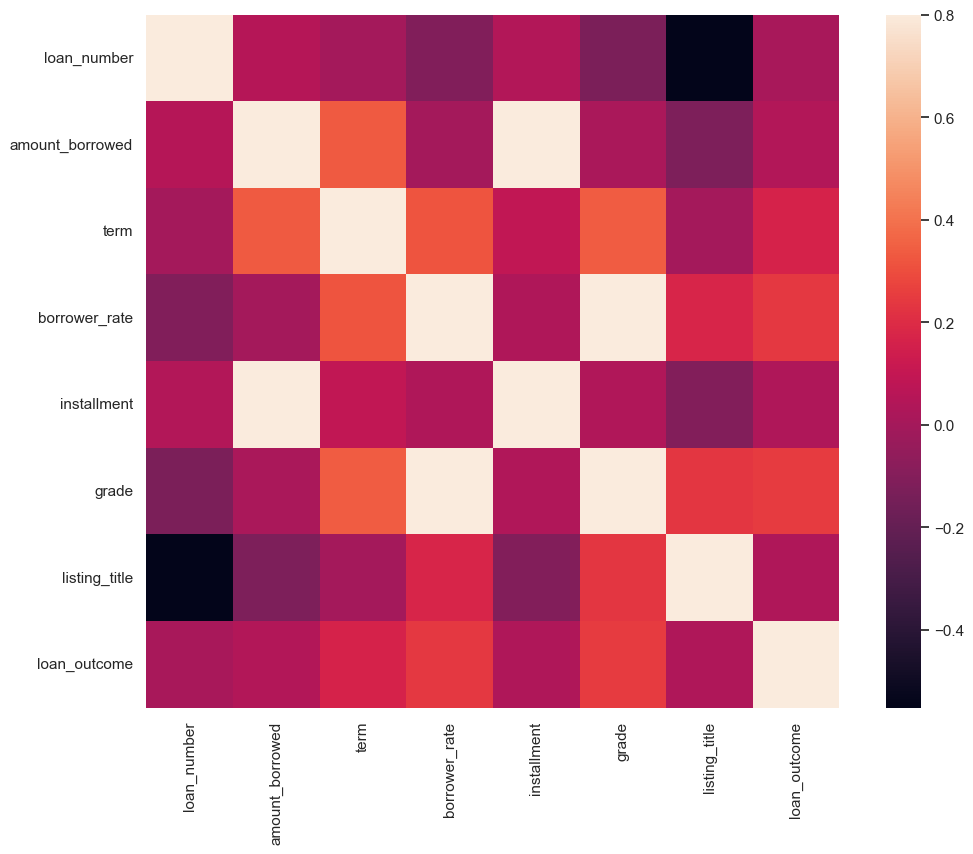

In [81]:
#correlation matrix
corrmat = df_filtered.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

## Splitting data into training data and test data

'loan_status_description' will be our 'target' for the Machine Learning model to learn from and predict.
Before we feed the clean dataset into the model, we will split the dataset into training data and testing data.  The ML model will train on the training dataset and we will observe the model accuracy by feeding test data into the model for predicted targets.

In general, we will split the dataset 70/30.  70% of data will be used as training data and 30% for testing.  

Because most bankruptcy/bad debt data is imbalanced, i.e only a small percentage of data is bankrupt.  We need to make sure that both the training and testing dataset has the same proportion of bankruptcy.
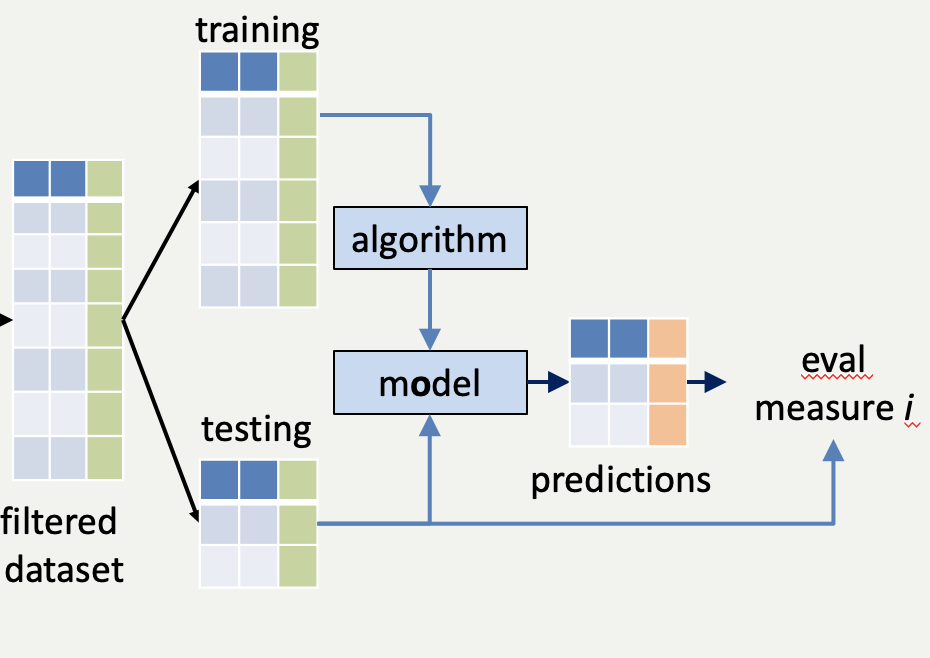

In [82]:
# import the libraries that help us split the dataset
from sklearn.model_selection import train_test_split

In [83]:
# After you drop columms, make sure the column index matches
x, y = df_filtered.iloc[:, 0:6], df_filtered.iloc[:,7]

In [84]:
df_filtered.head()

,loan_number,amount_borrowed,term,borrower_rate,installment,grade,listing_title,loan_outcome
187627,1054241,6625.0,36,0.0790,207.30,0,1,0
186448,1101617,7000.0,36,0.0790,219.04,0,1,0
186447,1101472,1200.0,36,0.0790,37.55,0,2,0
186446,1101635,20000.0,36,0.0890,635.07,0,6,1
186445,1099185,35000.0,36,0.1903,1283.50,4,2,0


In [85]:
# We will do a 70/30 split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y, shuffle=True)

In [86]:
# 0=completed, 1=defaulted
y_test.value_counts()

loan_outcome
0    351949
1     96139
Name: count, dtype: int64

In [87]:
y_train.value_counts()

loan_outcome
0    821213
1    224325
Name: count, dtype: int64

In [88]:
x_train.head()

,loan_number,amount_borrowed,term,borrower_rate,installment,grade
2111002,190654,30000.0,60,0.1485,711.337974,2
2101217,186345,35000.0,36,0.1089,1144.032740,1
2028923,99988,10000.0,36,0.2049,374.137218,3
2522946,655890,8000.0,36,0.1203,265.829122,2
490535,65179167,8000.0,36,0.1367,272.150000,2


In [89]:
# import ML libraries
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='entropy',random_state=42)

# Train Decision Tree Classifer
clf = clf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [90]:
#Predict the response for test dataset
y_pred = clf.predict(x_test)

## Evaluation
### Model performance

In [91]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

tp = float(cm[1][1])
tn = float(cm[0][0])
fp = float(cm[0][1])
fn = float(cm[1][0])

print(cm)

[[282378  69571]
 [ 68156  27983]]


In [92]:
# Sensitivity: the ability of a test to correctly identify loans that will default.
sensitivity = tp/(tp+fn)

# Specificity: the ability of a test to correctly identify loans that will complete(Without default).
specificity = tn/(tn+fp)

print(sensitivity)
print(specificity)

0.2910681409209582
0.8023264734379129


## Part 2 - Option 1

### Dealing with missing data

In [93]:
df['listing_title'].isnull().sum()

0

In [96]:
df['listing_title'].value_counts('unknown')

listing_title
debt_consolidation    4.014767e-01
unknown               3.001858e-01
credit_card           1.534499e-01
home_improvement      4.739342e-02
other                 4.327676e-02
major_purchase        1.545730e-02
medical               8.628431e-03
small_business        7.941858e-03
car                   7.394755e-03
vacation              4.866535e-03
moving                4.638373e-03
house                 4.208134e-03
wedding               6.434456e-04
renewable_energy      4.378908e-04
educational           6.956168e-07
Name: proportion, dtype: float64

[Text(0, 0, 'credit_card'),
 Text(1, 0, 'debt_consolidation'),
 Text(2, 0, 'major_purchase'),
 Text(3, 0, 'car'),
 Text(4, 0, 'renewable_energy'),
 Text(5, 0, 'medical'),
 Text(6, 0, 'other'),
 Text(7, 0, 'small_business'),
 Text(8, 0, 'home_improvement'),
 Text(9, 0, 'vacation'),
 Text(10, 0, 'wedding'),
 Text(11, 0, 'house'),
 Text(12, 0, 'moving'),
 Text(13, 0, 'unknown'),
 Text(14, 0, 'educational')]

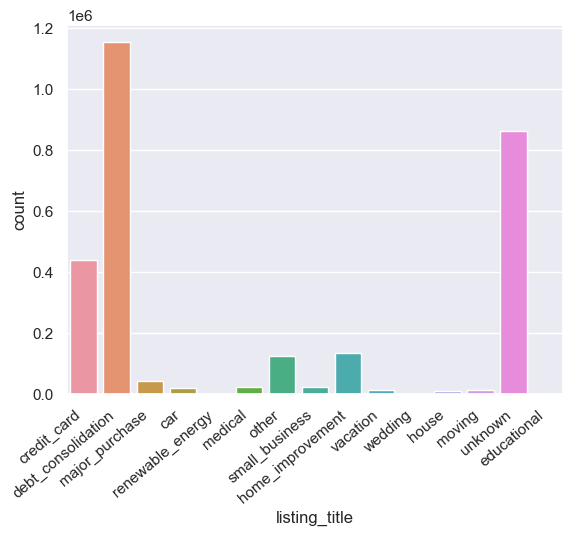

In [97]:
ax = sns.countplot(x=df['listing_title'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

Here we can see the amount of missing value ('unknown') under listing title is significant. Deleting them would erase a good chunk of our dataset.

However, I am unsure whether linear or polynomial interpolation would be appropriete for a catagorical value. Even though we used labelEncoder to transform those into numerical values, those are arbitrary number assigned to each catagory, they could be anything (i.e., why not use 4 to indicate debt consolidate instead of 7?).
Furthermore, there are no relationships between each listing titles.

Previously mentioned methods like mean substitution, regression with multiple imputation does not apply here.
External sources recommended filling with mode, but this would skew the proportion of debt consolidation. 

Therefore, I believe it's best to drop any N/A or unknown values under column listing titles.

### Outliers

Examining amount borrowed outliers

In [143]:
df_filtered['amount_borrowed'].describe()

count    1.493626e+06
mean     1.399432e+04
std      8.372440e+03
min      1.000000e+03
25%      7.500000e+03
50%      1.200000e+04
75%      2.000000e+04
max      4.000000e+04
Name: amount_borrowed, dtype: float64

<Axes: xlabel='amount_borrowed'>

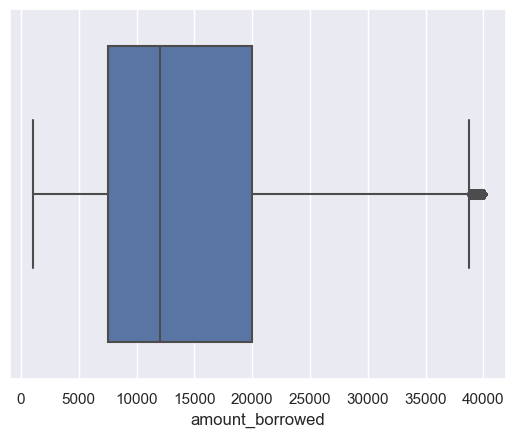

In [144]:
sns.boxplot(x=df_filtered['amount_borrowed'])

In [145]:
# Calculate the first quartile (Q1) and third quartile (Q3) for each column
Q1 = df_filtered['amount_borrowed'].quantile(0.25)
Q3 = df_filtered['amount_borrowed'].quantile(0.75)

# Calculate the interquartile range (IQR) for each column
IQR = Q3 - Q1

# Determine the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#outliers count
outliers = ((df_filtered['amount_borrowed'] < lower_bound) | (df_filtered['amount_borrowed'] > upper_bound)).sum()
print(outliers)

3118


In [146]:
#outlier percentage of total
print(outliers/df_filtered['amount_borrowed'].count()*100,"%")

0.20875373085364074 %


In [147]:
#dropping outliers
df_filtered_dpot = df_filtered[(df_filtered['amount_borrowed'] >= lower_bound) & (df_filtered['amount_borrowed'] <= upper_bound)]

In [148]:
df_filtered_dpot['amount_borrowed'].describe()

count    1.490508e+06
mean     1.393997e+04
std      8.296361e+03
min      1.000000e+03
25%      7.500000e+03
50%      1.200000e+04
75%      2.000000e+04
max      3.875000e+04
Name: amount_borrowed, dtype: float64

Examining borrower rate outliers

In [149]:
df_filtered['borrower_rate'].describe()

count    1.493626e+06
mean     1.402619e-01
std      5.394325e-02
min      5.310000e-02
25%      1.005000e-01
50%      1.319000e-01
75%      1.699000e-01
max      3.192000e-01
Name: borrower_rate, dtype: float64

<Axes: xlabel='borrower_rate'>

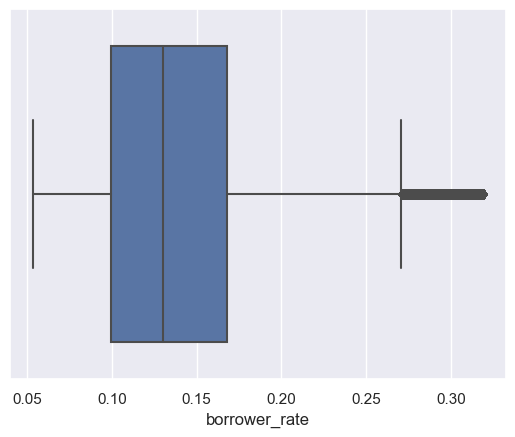

In [150]:
sns.boxplot(x=df['borrower_rate'])

In [151]:
# Calculate the first quartile (Q1) and third quartile (Q3) for each column
Q1 = df_filtered['borrower_rate'].quantile(0.25)
Q3 = df_filtered['borrower_rate'].quantile(0.75)

# Calculate the interquartile range (IQR) for each column
IQR = Q3 - Q1

# Determine the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#outliers count
outliers = ((df_filtered['borrower_rate'] < lower_bound) | (df_filtered['borrower_rate'] > upper_bound)).sum()
print(outliers)

34925


In [152]:
#outlier percentage of total
print(outliers/df_filtered['borrower_rate'].count()*100,"%")

2.3382694195200138 %


In [153]:
df_filtered_dpot = df_filtered_dpot[(df_filtered_dpot['borrower_rate'] >= lower_bound) & (df_filtered_dpot['borrower_rate'] <= upper_bound)]

In [154]:
df_filtered_dpot['borrower_rate'].describe()

count    1.455627e+06
mean     1.364984e-01
std      4.857417e-02
min      5.310000e-02
25%      9.990000e-02
50%      1.311000e-01
75%      1.673000e-01
max      2.736000e-01
Name: borrower_rate, dtype: float64

Examining installment outliers

In [155]:
df_filtered['installment'].describe()

count    1.493626e+06
mean     4.295506e+02
std      2.521799e+02
min      4.930000e+00
25%      2.455100e+02
50%      3.732882e+02
75%      5.655961e+02
max      2.251506e+03
Name: installment, dtype: float64

<Axes: xlabel='installment'>

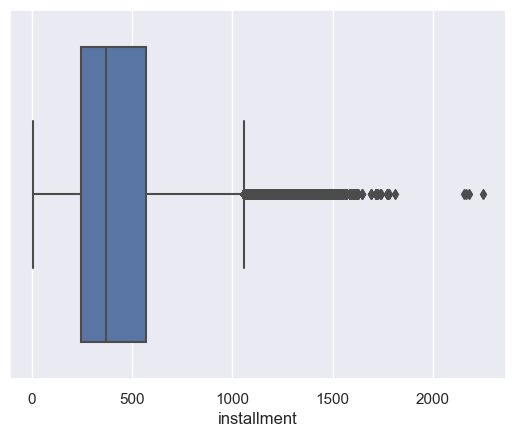

In [156]:
sns.boxplot(x=df['installment'])

In [157]:
# Calculate the first quartile (Q1) and third quartile (Q3) for each column
Q1 = df_filtered['installment'].quantile(0.25)
Q3 = df_filtered['installment'].quantile(0.75)

# Calculate the interquartile range (IQR) for each column
IQR = Q3 - Q1

# Determine the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#outliers count
outliers = ((df_filtered['installment'] < lower_bound) | (df_filtered['installment'] > upper_bound)).sum()
print(outliers)

45529


In [158]:
#outlier percentage of total
print(outliers/df_filtered['installment'].count()*100,"%")

3.0482195676829407 %


In [159]:
df_filtered_dpot = df_filtered_dpot[(df_filtered_dpot['installment'] >= lower_bound) & (df_filtered_dpot['installment'] <= upper_bound)]

In [160]:
df_filtered_dpot['installment'].describe()

count    1.413058e+06
mean     4.079080e+02
std      2.182382e+02
min      4.930000e+00
25%      2.429300e+02
50%      3.677342e+02
75%      5.434153e+02
max      1.045670e+03
Name: installment, dtype: float64

In above boxplots, the "whiskers" extend from the box to the minimum and maximum values within a certain range, typically 1.5 times the IQR.
Data points outside this range are considered outliers and are plotted individually beyond the whiskers.

Here we can see outliers outside of the upper range across all 3 boxplots.

Having examined maximum outliers, the data points are possible and appears to be reasonable, which means the outliers are NOT results of errors in the measurement.

I've also analyzed the proportion of the outliers, they accouont for a small percentage of total observations, it won't significantly change the data. 

Therefore, I've decided to drop the outliers.

### Multicollinearity

In [162]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from statsmodels.regression.linear_model import OLS

In [163]:
df_with_const = add_constant(df_filtered_dpot)

In [164]:
# Calculate VIF for each predictor variable
vif_data = pd.DataFrame()
vif_data["Predictor"] = df_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(df_with_const.values, i) for i in range(df_with_const.shape[1])]

# Display the VIF data
print(vif_data)

C:\Users\tcliu\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


         Predictor        VIF
0            const   0.000000
1      loan_number   1.441232
2  amount_borrowed  52.199066
3             term   6.382313
4    borrower_rate  11.774884
5      installment  43.856453
6            grade  11.335207
7    listing_title   1.569135
8     loan_outcome   1.076254


We can see amount borrowed and installment have very high VIF. Borrower rate and grade have moderate VIF.

### Algo 1

In [180]:
#dropping installment and grade
df_filtered_dpot_algo1 = df_filtered_dpot.drop(columns=['installment', 'grade'])

In [181]:
df_filtered_dpot_algo1.head()

,loan_number,amount_borrowed,term,borrower_rate,listing_title,loan_outcome
187627,1054241,6625.0,36,0.079,1,0
186448,1101617,7000.0,36,0.079,1,0
186447,1101472,1200.0,36,0.079,2,0
186446,1101635,20000.0,36,0.089,6,1
186444,1100832,16000.0,36,0.079,2,0


In [182]:
# import the libraries that help us split the dataset
from sklearn.model_selection import train_test_split

In [183]:
# After you drop columms, make sure the column index matches
x, y = df_filtered_dpot_algo1.iloc[:, 0:4], df_filtered_dpot_algo1.iloc[:,5]

In [184]:
# We will do a 70/30 split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y, shuffle=True)

In [185]:
# import ML libraries
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='entropy',random_state=42)

# Train Decision Tree Classifer
clf = clf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [186]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

tp = float(cm[1][1])
tn = float(cm[0][0])
fp = float(cm[0][1])
fn = float(cm[1][0])

print(cm)

[[269252  65394]
 [ 63767  25505]]


In [187]:
# Sensitivity: the ability of a test to correctly identify loans that will default.
sensitivity = tp/(tp+fn)

# Specificity: the ability of a test to correctly identify loans that will complete(Without default).
specificity = tn/(tn+fp)

print(sensitivity)
print(specificity)

0.2856998835021059
0.8045875342899661


### Algo 2

In [188]:
#dropping amount borrowed and borrower rate
df_filtered_dpot_algo2 = df_filtered_dpot.drop(columns=['amount_borrowed', 'borrower_rate'])

In [189]:
df_filtered_dpot_algo2.head()

,loan_number,term,installment,grade,listing_title,loan_outcome
187627,1054241,36,207.30,0,1,0
186448,1101617,36,219.04,0,1,0
186447,1101472,36,37.55,0,2,0
186446,1101635,36,635.07,0,6,1
186444,1100832,36,500.65,0,2,0


In [190]:
# import the libraries that help us split the dataset
from sklearn.model_selection import train_test_split

# After you drop columms, make sure the column index matches
x, y = df_filtered_dpot_algo2.iloc[:, 0:4], df_filtered_dpot_algo2.iloc[:,5]

# We will do a 70/30 split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y, shuffle=True)

# import ML libraries
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='entropy',random_state=42)

# Train Decision Tree Classifer
clf = clf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [191]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

tp = float(cm[1][1])
tn = float(cm[0][0])
fp = float(cm[0][1])
fn = float(cm[1][0])

print(cm)

[[269027  65619]
 [ 63794  25478]]


In [192]:
# Sensitivity: the ability of a test to correctly identify loans that will default.
sensitivity = tp/(tp+fn)

# Specificity: the ability of a test to correctly identify loans that will complete(Without default).
specificity = tn/(tn+fp)

print(sensitivity)
print(specificity)

0.2853974370463303
0.8039151820132319


## Algo 3
### Logistic Regression

In [204]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [205]:
df_filtered.head()

,loan_number,amount_borrowed,term,borrower_rate,installment,grade,listing_title,loan_outcome
187627,1054241,6625.0,36,0.0790,207.30,0,1,0
186448,1101617,7000.0,36,0.0790,219.04,0,1,0
186447,1101472,1200.0,36,0.0790,37.55,0,2,0
186446,1101635,20000.0,36,0.0890,635.07,0,6,1
186445,1099185,35000.0,36,0.1903,1283.50,4,2,0


In [206]:
x, y = df_filtered.iloc[:, 0:6], df_filtered.iloc[:,7]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y, shuffle=True)


#Create a logistic regression model object
model = LogisticRegression()

#Train the model using the training data
model.fit(x_train, y_train)

#Evaluate the model using the testing data
y_pred = model.predict(x_test)

In [207]:
y_test.value_counts()

loan_outcome
0    351949
1     96139
Name: count, dtype: int64

In [208]:
y_train.value_counts()

loan_outcome
0    821213
1    224325
Name: count, dtype: int64

In [209]:
x_train.head()

,loan_number,amount_borrowed,term,borrower_rate,installment,grade
2111002,190654,30000.0,60,0.1485,711.337974,2
2101217,186345,35000.0,36,0.1089,1144.032740,1
2028923,99988,10000.0,36,0.2049,374.137218,3
2522946,655890,8000.0,36,0.1203,265.829122,2
490535,65179167,8000.0,36,0.1367,272.150000,2


In [210]:
# import ML libraries
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='entropy',random_state=42)

# Train Decision Tree Classifer
clf = clf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [211]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

tp = float(cm[1][1])
tn = float(cm[0][0])
fp = float(cm[0][1])
fn = float(cm[1][0])

print(cm)

[[282378  69571]
 [ 68156  27983]]


In [212]:
sensitivity = tp/(tp+fn)
specificity = tn/(tn+fp)
print(sensitivity)
print(specificity)

0.2910681409209582
0.8023264734379129


Here is my attempt at using the logistic regression model to predict loan default, I've imported the relevant packages, splitted the data, but the confusion matrix doesnt make sense (the same figure as the demonstrative model), I couldn't figure out why...

I really wanted to experiement with the logistic regression model, because I've read that it works well when dependent variable is binary or catagorical, which is what we have here. Linear and multilinear regression are less suitable for binary outcomes because they predict continuous values, which may not make sense for binary classifications.

## Evaluation

Algo 1 and Algo 2's sensitivity fell slightly. 

For algo 1 feature engineering I've dropped installment and grade due to multicollinearity. 
For algo 2 I've dropped amount borrowed and borrower rate for the same reason.
Missing data and outliers are also dropped, the rationale were provided alongside with the code.

Algo 1's predictive result essentially says there is a 28.6% chance the ML can identify loans that will default, 80.5% chance ML can identify loans that will complete. 

Algo 2's predictive result essentially says there is a 28.53% chance the ML can identify loans that will default, 80.4% chance ML can identify loans that will complete. 
Sensitivity is the more important metric for this business. 

I'm not too satisfied with the result since both algo are a step down from my previous sensitivity levels at 0.291068.

Both algos definitely have room for imporvement, if I had the capability, I would like to explore more ML models.


If possible, I'd like to add additonal/alternative data such as the clients FICO score, education level, profession, years of experience, income data, macroeconomic environment at the origination date, car or house ownership, marital status, into the model, I believe these are correlated with the outcome and it can certainly help improve our ML model. However, it's uncertain what data goes into determining the grade, it could be the result of some of the data mentioned above.